In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
dsSell2013 = pd.read_csv("sell2013.csv", low_memory=False)
dsSell2014 = pd.read_csv("sell2014.csv", low_memory=False)
dsSell2015 = pd.read_csv("sell2015.csv", low_memory=False)
dsSell2016 = pd.read_csv("sell2016.csv", low_memory=False)
dsSell2017 = pd.read_csv("sell2017.csv", low_memory=False)

In [11]:
pd.DataFrame(dsSell2013.groupby('place_name')['price'].sum().reset_index()).join(dsSell2013.groupby('place_name').count())

ValueError: columns overlap but no suffix specified: Index(['price'], dtype='object')

In [274]:
dsSell2013.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'image_thumbnail'],
      dtype='object')

In [275]:
dsSell2014.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'image_thumbnail'],
      dtype='object')

In [276]:
dsSell2015.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'extra', 'image_thumbnail'],
      dtype='object')

In [277]:
#unimos todos los csv y filtramos para que solo queda GBA y CABA
dsSell = dsSell2013.append(dsSell2014).append(dsSell2015).append(dsSell2016).append(dsSell2017)

In [278]:
dsSell.head()

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,NaN,2012-08-08,NaN,NaN,850 aprox,NaN,10.0,3436077.0,NaN,http://cf-thumbs.properati.com.ar/Cry7pVKa41t_...,...,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,apartment,3.0,NaN,NaN,102.0,NaN,NaN
1,NaN,2012-08-08,NaN,NaN,NaN,NaN,11.0,3427467.0,NaN,http://cf-thumbs.properati.com.ar/MwrzW_dkQbqR...,...,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,apartment,3.0,NaN,NaN,73.0,NaN,NaN
2,NaN,2012-08-08,NaN,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/2wMqxAsh1N2t...,...,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,house,4.0,NaN,NaN,485.0,NaN,NaN
3,NaN,2012-08-08,USD,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...,...,NaN,315.186246,http://www.properati.com.ar/ak_venta_casa_vill...,house,4.0,NaN,NaN,349.0,NaN,NaN
4,NaN,2012-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/4kPnofvgR6hs...,...,NaN,NaN,http://www.properati.com.ar/ao_venta_departame...,apartment,3.0,NaN,NaN,NaN,NaN,NaN


In [279]:
#Queremos quedarnos con la zona, el municipio y los que esten en CABA y GBA

dsSell['municipio'] = dsSell['place_with_parent_names'].apply(lambda x: x.split('|')[3])
dsSell['zona'] = dsSell['place_with_parent_names'].apply(lambda x: x.split('|')[2])

dsSell['filtro'] = dsSell['zona'].apply(lambda x: ((x=='Capital Federal')or(x=='Bs.As. G.B.A. Zona Norte')or(x=='Bs.As. G.B.A. Zona Sur')or(x=='Bs.As. G.B.A. Zona Oeste')))
dsSell = dsSell[dsSell.filtro]
dsSell.drop('filtro', axis=1, inplace=True)

In [280]:
#Como nos importa mucho el precio con respecto a otras cosas vamos a sacar a los que tienen esa columna en NaN

dsSell['tiene_precio'] = dsSell['price'].apply(lambda x: pd.notnull(x))
dsSell = dsSell[dsSell.tiene_precio]
dsSell.drop('tiene_precio', axis=1, inplace=True)

In [281]:
dsSell.groupby('municipio').price_aprox_usd.mean().head()

municipio
                   270231.721642
Abasto             155498.772601
Agronomía          157318.141667
Almagro            148182.569555
Almirante Brown    196867.297707
Name: price_aprox_usd, dtype: float64

In [282]:
dsSell.columns

Index(['country_name', 'created_on', 'currency', 'description', 'expenses',
       'extra', 'floor', 'geonames_id', 'id', 'image_thumbnail', 'lat',
       'lat-lon', 'lon', 'operation', 'place_name', 'place_with_parent_names',
       'price', 'price_aprox_local_currency', 'price_aprox_usd',
       'price_per_m2', 'price_usd_per_m2', 'properati_url', 'property_type',
       'rooms', 'state_name', 'surface_covered_in_m2', 'surface_in_m2',
       'surface_total_in_m2', 'title', 'municipio', 'zona'],
      dtype='object')

In [283]:
#cuantos tipos de vivienda se vende

dsSell['property_type'].value_counts()

apartment    173536
house        101135
PH            19129
store          8020
Name: property_type, dtype: int64

In [284]:
#lugares donde mas se vende
dsSell['place_name'].value_counts()

Tigre                                  12115
Nordelta                               11696
Capital Federal                        11499
Pilar                                  10249
Belgrano                                9505
Ramos Mejía                             9379
Palermo                                 8294
Caballito                               6364
Olivos                                  6311
Morón                                   5211
San Isidro                              5119
Villa Urquiza                           4635
Benavidez                               4610
Villa Crespo                            4398
Barrio Norte                            4332
Recoleta                                4257
Flores                                  4241
Martínez                                4208
Haedo                                   4072
Ituzaingó                               4045
La Plata                                3942
Vicente López                           3845
Almagro   

In [285]:
dsSell[['place_name', 'price_aprox_usd']]

,place_name,price_aprox_usd
3,Villa Ballester,110000.0
6,San Martín,99000.0
10,Tigre,110000.0
11,Pilar,650000.0
12,Tigre,300000.0
13,Las Cañitas,600000.0
14,Flores,220000.0
16,Floresta,51900.0
17,Parque Centenario,195000.0
18,Liniers,115000.0


In [299]:
aux = dsSell.groupby('place_name').mean().reset_index().sort_values(by = 'price_aprox_usd',ascending= False)[['place_name', 'price_aprox_usd']]
aux

,place_name,price_aprox_usd
610,Área de Promoción El Triángulo,6.000000e+06
490,San Isidro Chico,1.798571e+06
27,Bahía del Sol,1.614286e+06
528,The Boating Club,1.295000e+06
105,Barrio La Isla,1.283365e+06
100,Barrio El Yacht,1.061250e+06
201,Club Newman,1.009333e+06
263,El Talar de Pacheco,9.479639e+05
428,Pacheco Golf Club,9.475938e+05
4,Abril Club de Campo,9.384138e+05


<IPython.core.display.Javascript object>


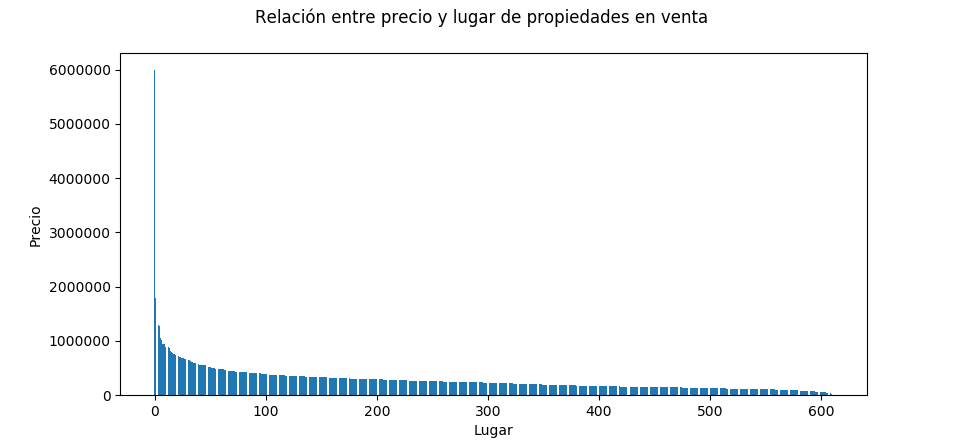

In [300]:
#se puede ver una relación exponencia entre el precio y la zona de las propiedades. 
#este gráfico sólo tiene la finalidad de ver como decrecen exponencialmente los precios de las zonas,
#ya que no esta bien definido el label del eje x 
%matplotlib notebook

numeros = list(range(0, len(aux['place_name'])))
plt.bar(numeros, aux['price_aprox_usd'])
plt.suptitle("Relación entre precio y lugar de propiedades en venta")
plt.xlabel("Lugar")
plt.ylabel("Precio")

plt.show()


In [301]:
aux = dsSell.groupby('place_name').count().reset_index().rename(columns={'price_aprox_usd':'cantidad'}).sort_values(by = 'cantidad',ascending= False)[['place_name', 'cantidad']]
aux

,place_name,cantidad
529,Tigre,12115
421,Nordelta,11696
183,Capital Federal,11499
444,Pilar,10249
156,Belgrano,9505
464,Ramos Mejía,9379
429,Palermo,8294
178,Caballito,6364
423,Olivos,6311
417,Morón,5211


<IPython.core.display.Javascript object>


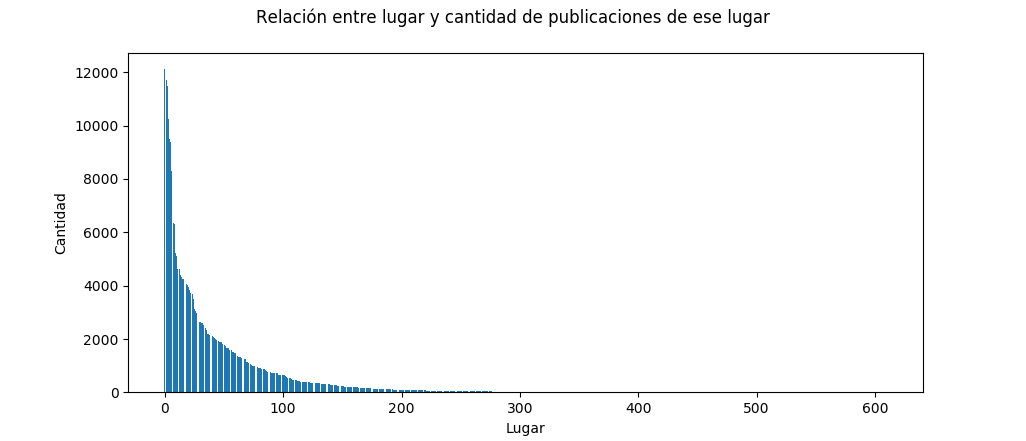

In [303]:
#se puede ver una relación exponencia entre la cantidad de publicaciones y la zona las propiedades. 
#este gráfico sólo tiene la finalidad de ver como decrecen exponencialmente la cantidad de publicaciones de las zonas,
#ya que no esta bien definido el label del eje x 
%matplotlib notebook

numeros = list(range(0, len(aux['place_name'])))
plt.bar(numeros, aux['cantidad'])
plt.suptitle("Relación entre lugar y cantidad de publicaciones de ese lugar")
plt.xlabel("Lugar")
plt.ylabel("Cantidad")

plt.show()


In [304]:
#convertimos el formato de la fecha
dsSell['year'] =pd.to_numeric(dsSell['created_on'].map( lambda x: x.split('-')[0]))
dsSell['month'] = pd.to_numeric(dsSell['created_on'].map( lambda x: x.split('-')[1]))
dsSell['created_on'] = dsSell['created_on'] .map(lambda x: x.split('-')[0]+x.split('-')[1]+x.split('-')[2])
dsSell

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,municipio,zona,year,month
3,NaN,20120808,USD,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...,...,4.0,NaN,NaN,349.0,NaN,NaN,General San Martín,Bs.As. G.B.A. Zona Norte,2012,8
6,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/BJum1WvpYb6P...,...,NaN,NaN,NaN,153.0,NaN,NaN,General San Martín,Bs.As. G.B.A. Zona Norte,2012,8
10,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/77Q-mNgsgx7O...,...,NaN,NaN,NaN,85.0,NaN,NaN,Tigre,Bs.As. G.B.A. Zona Norte,2012,8
11,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/DuUbXCV9Xzos...,...,4.0,NaN,NaN,383.0,NaN,NaN,Pilar,Bs.As. G.B.A. Zona Norte,2012,8
12,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/UAN_2iHtE0hA...,...,NaN,NaN,NaN,255.0,NaN,NaN,Tigre,Bs.As. G.B.A. Zona Norte,2012,8
13,NaN,20120808,USD,NaN,NaN,NaN,5.0,NaN,NaN,http://cf-thumbs.properati.com.ar/pJ0Vap4MCjhW...,...,4.0,NaN,NaN,240.0,NaN,NaN,Las Cañitas,Capital Federal,2012,8
14,NaN,20120809,USD,NaN,NaN,NaN,NaN,3433918.0,NaN,http://cf-thumbs.properati.com.ar/7LLinQKdItkV...,...,5.0,NaN,NaN,250.0,NaN,NaN,Flores,Capital Federal,2012,8
16,NaN,20120815,USD,NaN,NaN,NaN,NaN,3433910.0,NaN,http://cf-thumbs.properati.com.ar/folXLAuUibJC...,...,1.0,NaN,NaN,25.0,NaN,NaN,Floresta,Capital Federal,2012,8
17,NaN,20120815,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/QIshWpCxB_sU...,...,4.0,NaN,NaN,180.0,NaN,NaN,Parque Centenario,Capital Federal,2012,8
18,NaN,20120817,USD,NaN,NaN,NaN,NaN,3431333.0,NaN,http://cf-thumbs.properati.com.ar/vfIoxXFjrZY7...,...,3.0,NaN,NaN,108.0,NaN,NaN,Liniers,Capital Federal,2012,8


In [305]:
#vemos las distintas moneadas en las que se realizan las transacciones 
dsSell['currency'].value_counts()

USD    279287
ARS     21725
PEN         2
BRL         2
Name: currency, dtype: int64

In [306]:
#vemos como evolucionan algunos features en el tiempo para la venta
cantidadSellEnAnios = dsSell.groupby('created_on').count().reset_index().rename(columns={'price_aprox_usd':'cantidad'}).sort_values(by = 'created_on',ascending= True)[['created_on', 'cantidad']]
preciosSellEnAnios = dsSell.groupby('created_on').mean().reset_index().sort_values(by = 'created_on',ascending= True)[['created_on', 'price_aprox_usd']]

<IPython.core.display.Javascript object>


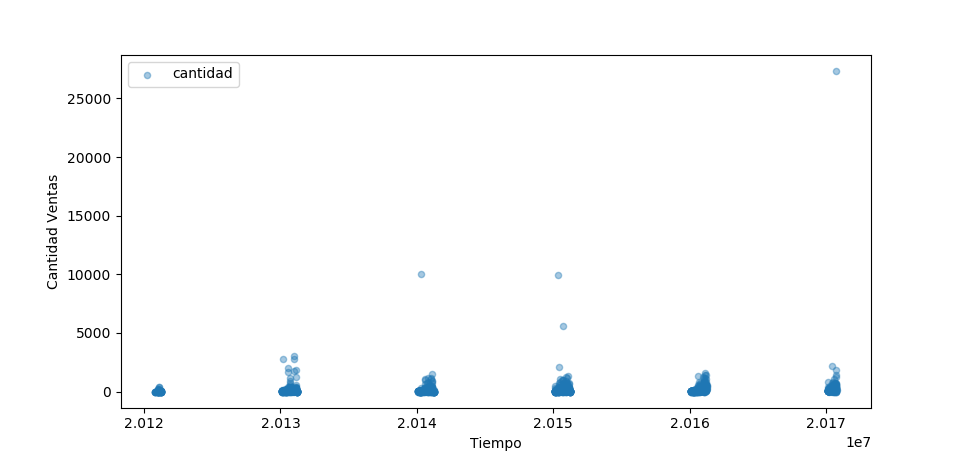

In [313]:
#cantidad de ventas para cada año 
%matplotlib notebook

cantidadSellEnAnios['created_on'] = pd.to_numeric(cantidadSellEnAnios['created_on'])

x, y = cantidadSellEnAnios['created_on'], cantidadSellEnAnios['cantidad']
plt.scatter(x, y, alpha=.4, s=20)
plt.ylabel('Cantidad Ventas')
plt.xlabel('Tiempo')
plt.legend()
plt.show()




<IPython.core.display.Javascript object>


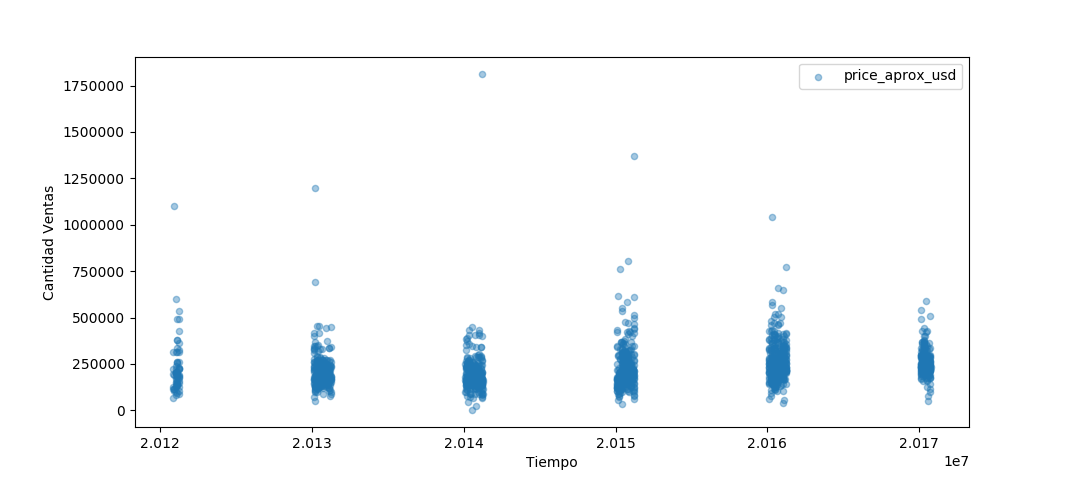

In [317]:
#precio de las publicaciones para cada año 
%matplotlib notebook

preciosSellEnAnios['created_on'] = pd.to_numeric(preciosSellEnAnios['created_on'])

x, y = preciosSellEnAnios['created_on'], preciosSellEnAnios['price_aprox_usd']
plt.scatter(x, y, alpha=.4, s=20)
plt.ylabel('Cantidad Ventas')
plt.xlabel('Tiempo')
plt.legend()
plt.show()


In [318]:
#Cantidad de viviendas vendidas en dolares y pesos a lo largo del tiempo
cantidadSellEnAniosEnDolares = dsSell[dsSell['currency'] == 'USD'].groupby('created_on').count().reset_index().rename(columns={'price':'cantidad'}).sort_values(by = 'created_on',ascending= True)[['created_on', 'cantidad']]
cantidadSellEnAniosEnPesos = dsSell[dsSell['currency'] == 'ARS'].groupby('created_on').count().reset_index().rename(columns={'price':'cantidad'}).sort_values(by = 'created_on',ascending= True)[['created_on', 'cantidad']]

<IPython.core.display.Javascript object>


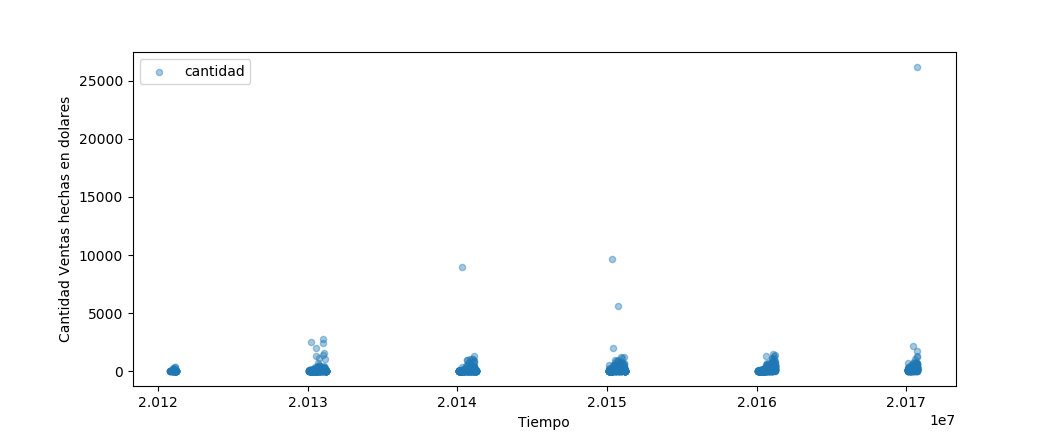

In [320]:
#Evolución de cantidad de ventas en el tiempo en dolares
%matplotlib notebook

cantidadSellEnAniosEnDolares['created_on'] = pd.to_numeric(cantidadSellEnAniosEnDolares['created_on'])

x, y = cantidadSellEnAniosEnDolares['created_on'], cantidadSellEnAniosEnDolares['cantidad']
plt.scatter(x, y, alpha=.4, s=20)
plt.ylabel('Cantidad Ventas hechas en dolares')
plt.xlabel('Tiempo')
plt.legend()
plt.show()



<IPython.core.display.Javascript object>


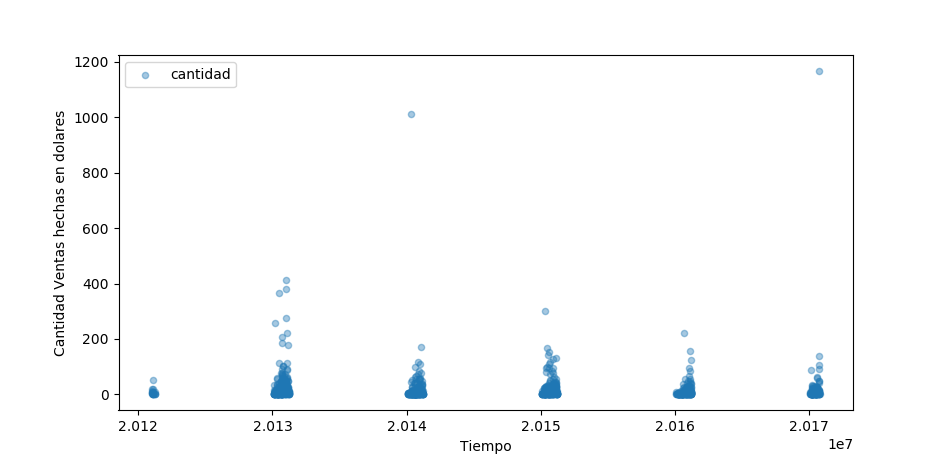

In [321]:
#Evolución de cantidad de ventas en el tiempo en pesos
%matplotlib notebook

cantidadSellEnAniosEnPesos['created_on'] = pd.to_numeric(cantidadSellEnAniosEnPesos['created_on'])

x, y = cantidadSellEnAniosEnPesos['created_on'], cantidadSellEnAniosEnPesos['cantidad']
plt.scatter(x, y, alpha=.4, s=20)
plt.ylabel('Cantidad Ventas hechas en dolares')
plt.xlabel('Tiempo')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


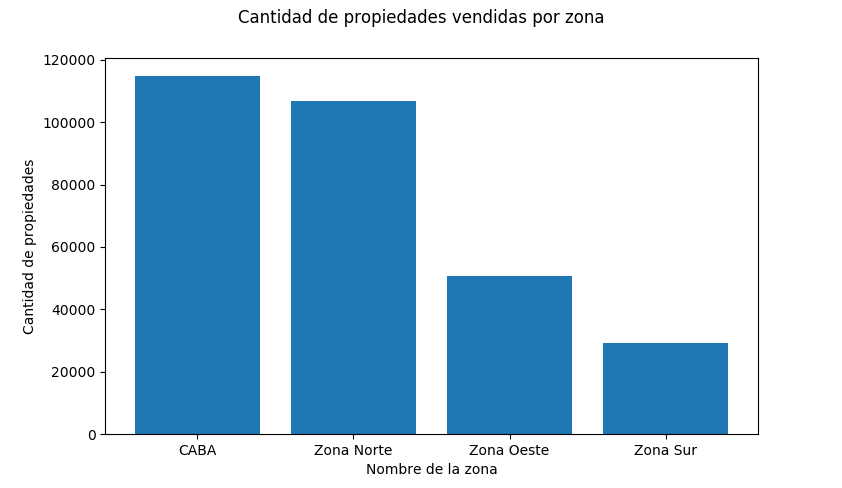

([<matplotlib.axis.XTick at 0x21c72909be0>,
 <a list of 4 Text xticklabel objects>)

In [322]:
#Vemos que zona tiene mas propiedades vendidas
%matplotlib notebook
nombre_zona = ['CABA', 'Zona Norte', 'Zona Oeste', 'Zona Sur']
cosa = [1, 2, 3, 4]
cant = dsSell['zona'].value_counts()
precios_zona = [cant[0], cant[1], cant[2], cant[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades vendidas por zona")
plt.xlabel("Nombre de la zona")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


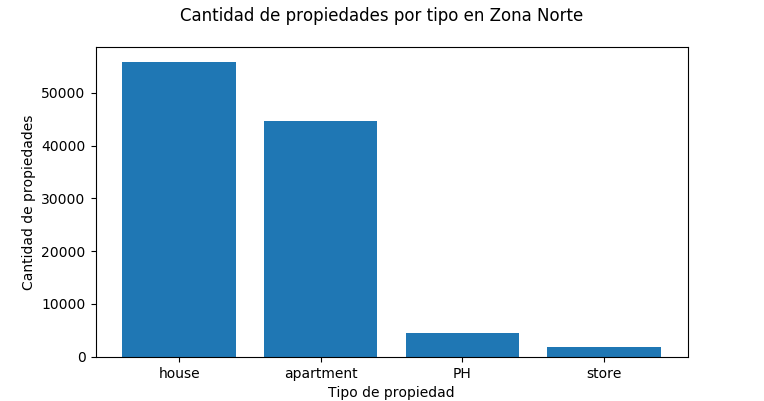

([<matplotlib.axis.XTick at 0x21c64857a58>,
 <a list of 4 Text xticklabel objects>)

In [323]:
#Calculamos que tipo de propiedad se vende mas en Zona Norte
%matplotlib notebook
nombre_zona = ['house', 'apartment', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Bs.As. G.B.A. Zona Norte']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Zona Norte")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


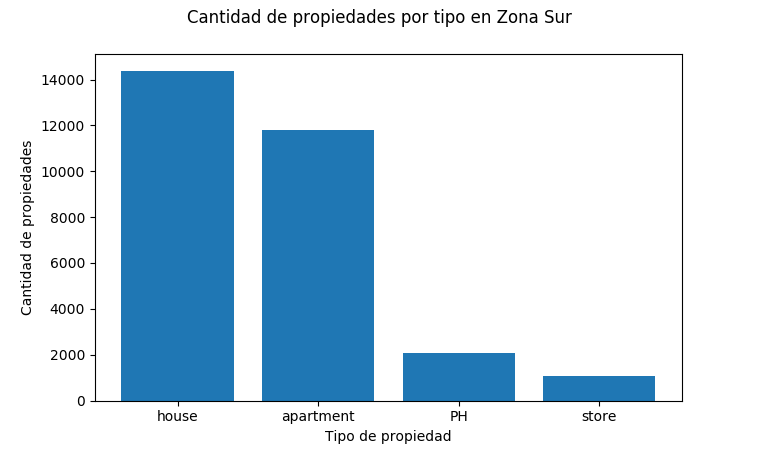

([<matplotlib.axis.XTick at 0x21c9764abe0>,
 <a list of 4 Text xticklabel objects>)

In [324]:
#Calculamos que tipo de propiedad se vende mas en Zona Sur
%matplotlib notebook
nombre_zona = ['house', 'apartment', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Bs.As. G.B.A. Zona Sur']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Zona Sur")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


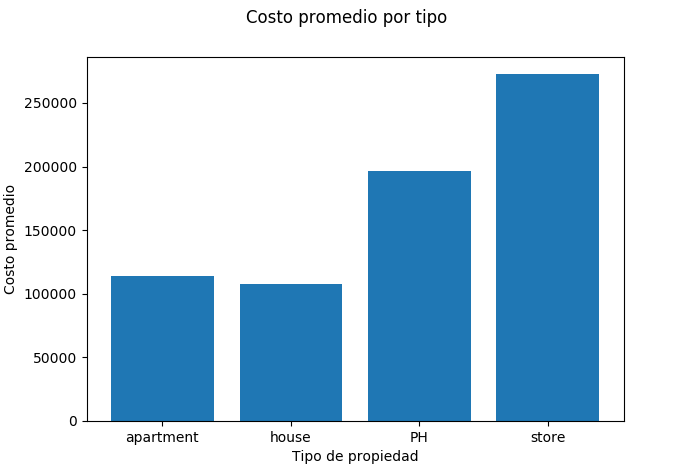

([<matplotlib.axis.XTick at 0x21c91ebc390>,
 <a list of 4 Text xticklabel objects>)

In [325]:
#Calculamos que tipo de propiedad se vende mas en Zona Oeste
%matplotlib notebook
nombre_zona = ['apartment', 'house', 'PH', 'store']
cosa = [1, 2, 3, 4]
aux = dsSell[dsSell.zona == 'Bs.As. G.B.A. Zona Oeste']
typ = aux.groupby('property_type').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Costo promedio por tipo")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Costo promedio")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


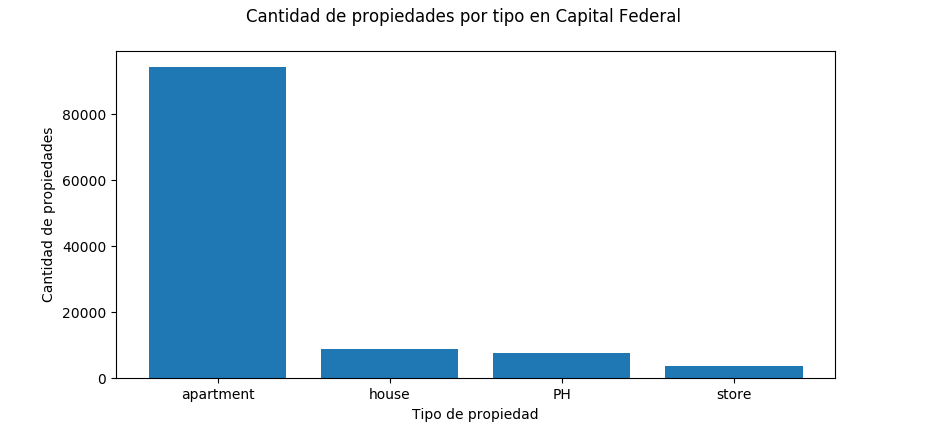

([<matplotlib.axis.XTick at 0x21c91eecc50>,
 <a list of 4 Text xticklabel objects>)

In [326]:


#Calculamos que tipo de propiedad se vende mas en Capital Federal
%matplotlib notebook
nombre_zona = ['apartment', 'house', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Capital Federal']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Capital Federal")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


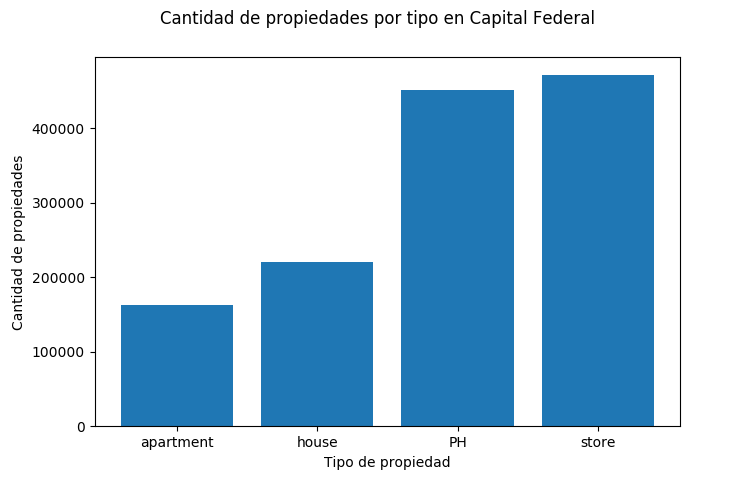

([<matplotlib.axis.XTick at 0x21c728fa630>,
 <a list of 4 Text xticklabel objects>)

In [327]:
#Calculamos cuanto sale cada tipo en promedio en Capital Federal
%matplotlib notebook
nombre_zona = ['apartment', 'house', 'PH', 'store']
cosa = [1, 2, 3, 4]
capi = dsSell[dsSell.zona == 'Capital Federal']
typ = capi.groupby('property_type').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Capital Federal")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


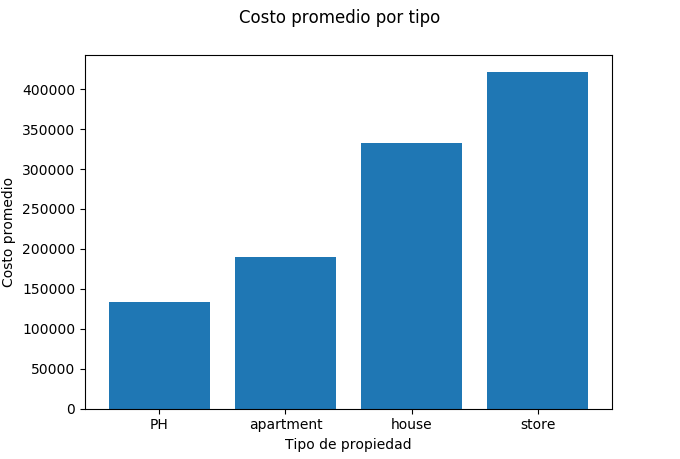

([<matplotlib.axis.XTick at 0x21c81484940>,
 <a list of 4 Text xticklabel objects>)

In [328]:
#Calculamos cuanto sale cada tipo en promedio 
%matplotlib notebook
nombre_zona = ['PH', 'apartment', 'house', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell.groupby('property_type').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Costo promedio por tipo")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Costo promedio")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


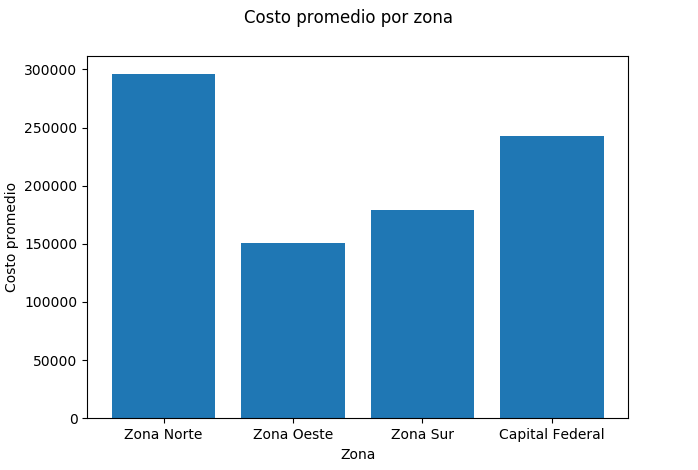

([<matplotlib.axis.XTick at 0x21c81342400>,
 <a list of 4 Text xticklabel objects>)

In [329]:
#Vemos que zona es mas cara en promedio
%matplotlib notebook
nombre_zona = ['Zona Norte', 'Zona Oeste', 'Zona Sur', 'Capital Federal']
cosa = [1, 2, 3, 4]
typ = dsSell.groupby('zona').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Costo promedio por zona")
plt.xlabel("Zona")
plt.ylabel("Costo promedio")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


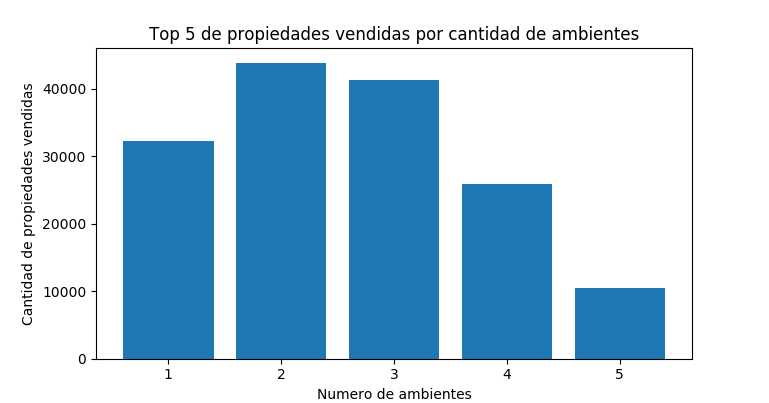

In [330]:
#Que cantidad de ambientes se vende mas?
%matplotlib notebook
cosa = [2, 3, 1, 4, 5]
typ = dsSell['rooms'].value_counts()
precios_piso = [typ[2], typ[3], typ[1], typ[4], typ[5]]
plt.bar(cosa, precios_piso)
plt.title('Top 5 de propiedades vendidas por cantidad de ambientes')
plt.xlabel('Numero de ambientes')
plt.ylabel('Cantidad de propiedades vendidas')

<IPython.core.display.Javascript object>


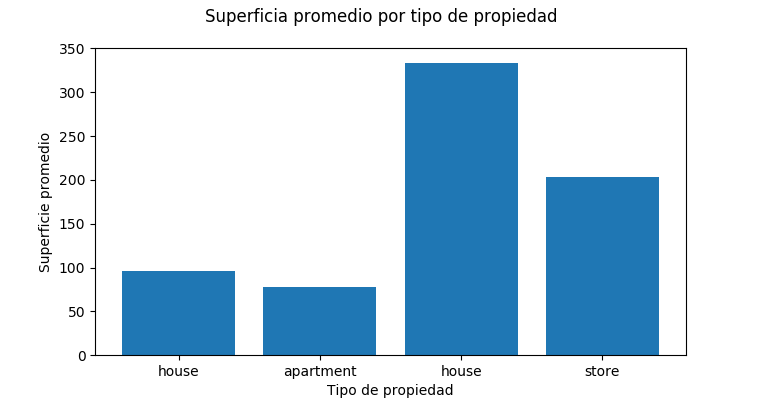

([<matplotlib.axis.XTick at 0x21c254d7e80>,
 <a list of 4 Text xticklabel objects>)

In [331]:
#Caculamos la superficie promedio de cada tipo de propiedad
%matplotlib notebook
cosa = [1, 2, 3, 4]
nombre_tipo=['house', 'apartment', 'house', 'store']
typ = dsSell.groupby('property_type').mean()['surface_in_m2']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Superficia promedio por tipo de propiedad")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Superficie promedio")
plt.xticks(cosa, nombre_tipo)

In [332]:
#vemos los precios por m2 para cada zona
dsSell.groupby('zona').mean()['price_usd_per_m2']

zona
Bs.As. G.B.A. Zona Norte    1610.989222
Bs.As. G.B.A. Zona Oeste    1327.090048
Bs.As. G.B.A. Zona Sur      1398.366268
Capital Federal             2641.700734
Name: price_usd_per_m2, dtype: float64

In [333]:
#contamos la cantidad de publicaciones para cada año
Sell2012 = dsSell[dsSell.created_on.str.contains('2012')]
Sell2013 = dsSell[dsSell.created_on.str.contains('2013')]
Sell2014 = dsSell[dsSell.created_on.str.contains('2014')]
Sell2015 = dsSell[dsSell.created_on.str.contains('2015')]
Sell2016 = dsSell[dsSell.created_on.str.contains('2016')]
Sell2017 = dsSell[dsSell.created_on.str.contains('2017')]
print (Sell2012.id.count())
print (Sell2013.id.count())
print (Sell2014.id.count())
print (Sell2015.id.count())
print (Sell2016.id.count())
print (Sell2017.id.count())

3
357
3599
8315
59443
76030


In [334]:
#generamos un df con los precios por m2 en usd para cada zona por año
dSell2012 = Sell2012.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2013 = Sell2013.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2014 = Sell2014.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2015 = Sell2015.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2016 = Sell2016.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2017 = Sell2017.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell_price_m2_per_year = Sell2012.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell_price_m2_per_year['price_usd_per_m2-2013'] = dSell2013['price_usd_per_m2']
dSell_price_m2_per_year['price_usd_per_m2-2014'] = dSell2014['price_usd_per_m2']
dSell_price_m2_per_year['price_usd_per_m2-2015'] = dSell2015['price_usd_per_m2']
dSell_price_m2_per_year['price_usd_per_m2-2016'] = dSell2016['price_usd_per_m2']
dSell_price_m2_per_year['price_usd_per_m2-2017'] = dSell2017['price_usd_per_m2']
dSell_price_m2_per_year.rename(columns={'price_usd_per_m2':'price_usd_per_m2-2012'},inplace = True)
dSell_price_m2_per_year.head()

,zona,price_usd_per_m2-2012,price_usd_per_m2-2013,price_usd_per_m2-2014,price_usd_per_m2-2015,price_usd_per_m2-2016,price_usd_per_m2-2017
0,Bs.As. G.B.A. Zona Norte,1381.806414,1851.048579,1211.650669,1403.292299,1634.885487,1847.432807
1,Bs.As. G.B.A. Zona Oeste,805.626271,1463.920457,1185.779292,1282.050329,1431.704285,1295.971166
2,Bs.As. G.B.A. Zona Sur,1206.732371,1500.689534,1191.057100,1233.497276,1343.147175,1512.130051
3,Capital Federal,2115.121019,2509.180265,2193.455416,2457.443527,2587.740926,3091.645588


In [335]:
#generamos df
per_m2 = dsSell.loc[:,['zona','price_usd_per_m2','created_on','property_type', 'year', 'month']]
per_m2['created_on'] = pd.to_numeric(per_m2['created_on'])
per_m2.head()

,zona,price_usd_per_m2,created_on,property_type,year,month
3,Bs.As. G.B.A. Zona Norte,315.186246,20120808,house,2012,8
6,Bs.As. G.B.A. Zona Norte,647.058824,20120808,house,2012,8
10,Bs.As. G.B.A. Zona Norte,1294.117647,20120808,apartment,2012,8
11,Bs.As. G.B.A. Zona Norte,1697.127937,20120808,house,2012,8
12,Bs.As. G.B.A. Zona Norte,1176.470588,20120808,house,2012,8


In [336]:
per_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301820 entries, 3 to 187480
Data columns (total 6 columns):
zona                301820 non-null object
price_usd_per_m2    210223 non-null float64
created_on          301820 non-null int64
property_type       301820 non-null object
year                301820 non-null int64
month               301820 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 16.1+ MB


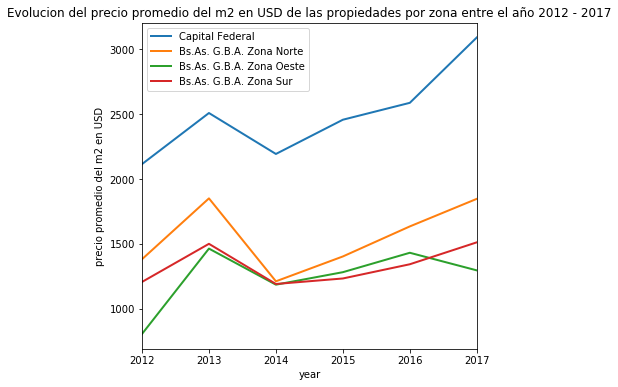

In [341]:
#evolucion del precio promedio del m2 en usd de las propiedades por zona a lo largo del tiempo
%matplotlib inline
indice = per_m2['zona'].value_counts().reset_index()['index']
plt.figure()
plt.title('Evolucion del precio promedio del m2 en USD de las propiedades por zona entre el año 2012 - 2017')

for i in indice:
    per_m2.loc[per_m2.zona.str.contains(i),['price_usd_per_m2','year']].groupby('year').mean().loc[:,'price_usd_per_m2'].plot(linewidth=2,figsize=(6,6),label=i);
plt.ylabel('precio promedio del m2 en USD')
plt.xlabel('year')
plt.legend()
plt.show()

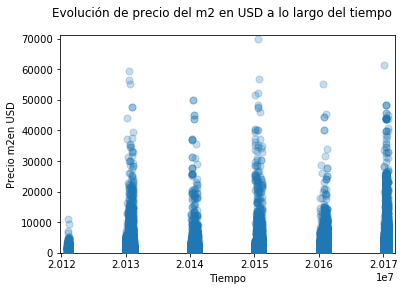

In [343]:
#evoluciond el precio del m2 en usd a lo largo del tiempo
marker_size=5
plt.scatter(per_m2['created_on'], per_m2['price_usd_per_m2'],s = 50,alpha=0.25,zorder=50)
plt.suptitle("Evolución de precio del m2 en USD a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Precio m2en USD")
plt.xlim([min(per_m2['created_on'])- 1000 , max(per_m2['created_on'])+1000])
plt.ylim([min(per_m2['price_usd_per_m2']), max(per_m2['price_usd_per_m2'] )- 1200000])
plt.show()

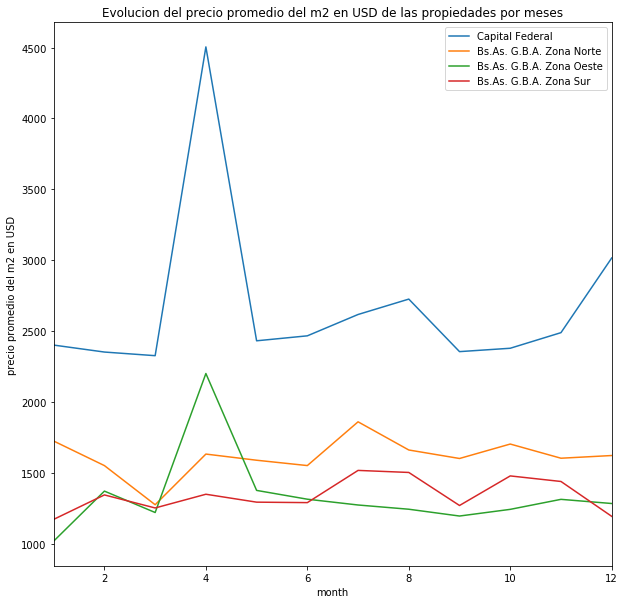

In [344]:
#evolucion del precio del m2 en usd por meses
%matplotlib inline

plt.figure()
plt.title('Evolucion del precio promedio del m2 en USD de las propiedades por meses')
for i in indice:
    
    per_m2.groupby('zona').get_group(i).loc[:,['zona','price_usd_per_m2','month']].groupby('month').mean().loc[:,'price_usd_per_m2'].plot(figsize=(10,10),label=i);
plt.ylabel('precio promedio del m2 en USD')
plt.xlabel('month')
plt.legend()
plt.show()

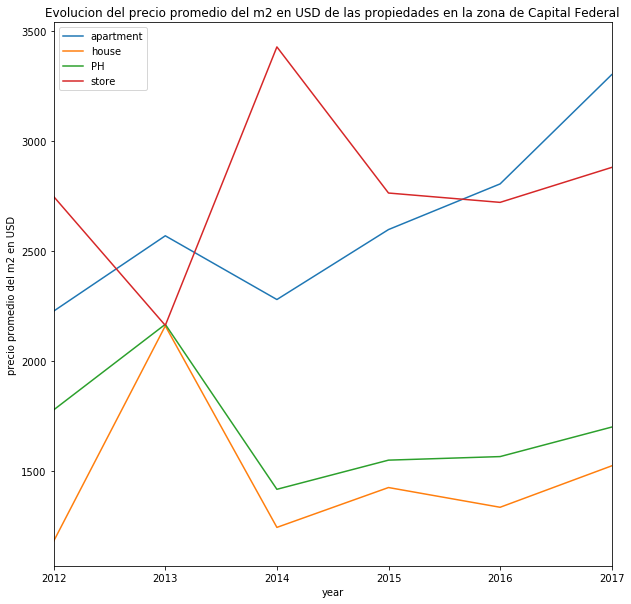

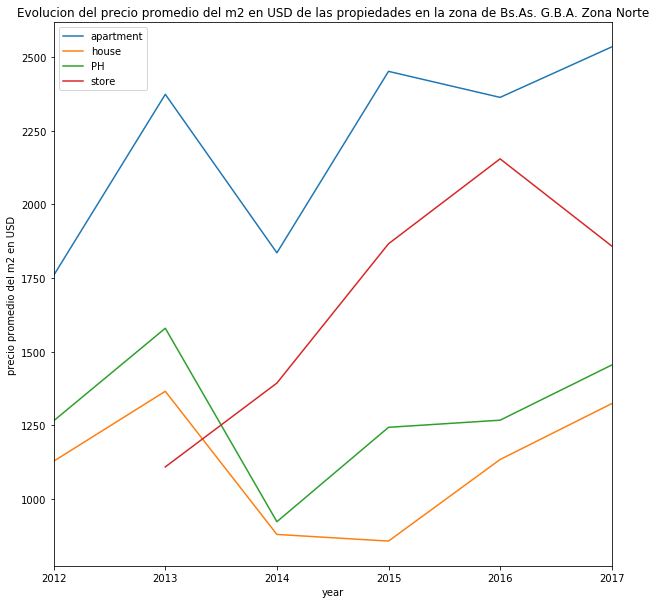

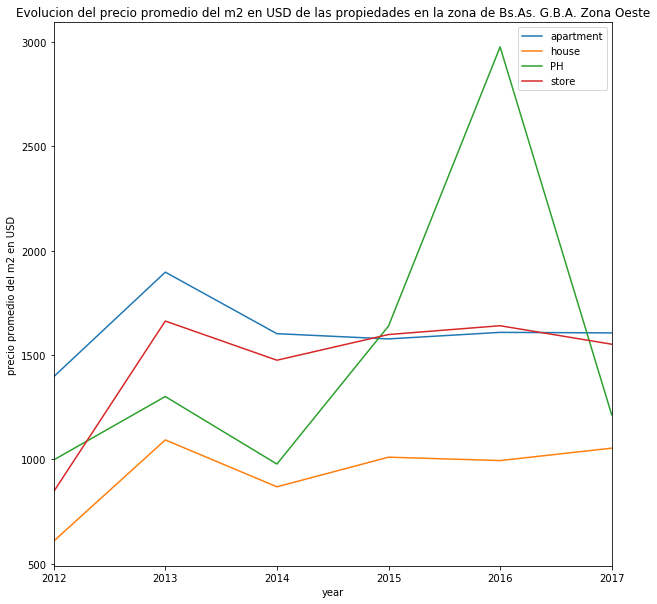

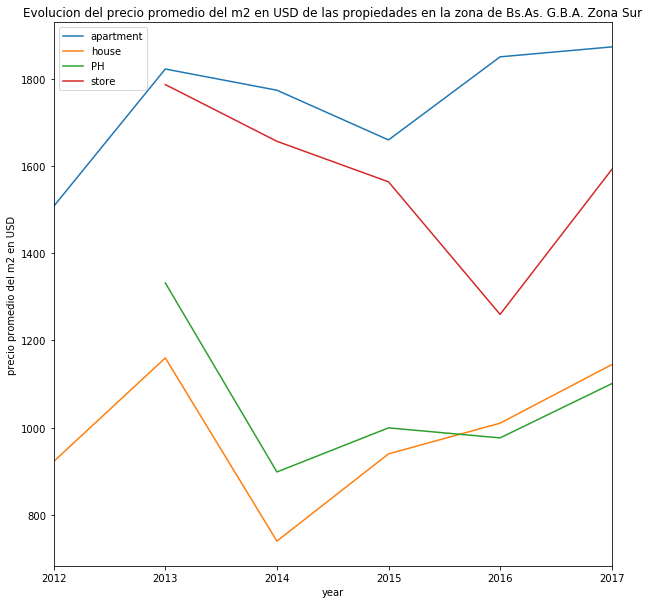

In [345]:
#evolucion del precio promedio del m2 en usd por tipo de propiedad para cada zona a lo largo del tiempo
%matplotlib inline

indiceType = per_m2['property_type'].value_counts().reset_index()['index']
indiceType
for a in indice:
    plt.figure()
    
    for i in indiceType:
        plt.title('Evolucion del precio promedio del m2 en USD de las propiedades en la zona de '+a)
        per_m2.groupby('zona').get_group(a).groupby('property_type').get_group(i).loc[:,['zona','price_usd_per_m2','year']].groupby('year').mean().loc[:,'price_usd_per_m2'].plot(figsize=(10,10),label=i);
    plt.ylabel('precio promedio del m2 en USD')
    plt.xlabel('year')
    plt.legend()
    plt.show()

In [351]:
 
cantidadEnVentaPorMes = dsSell.groupby(['month', 'year']).count().reset_index().rename(columns={'price_aprox_usd':'cantidad'})[['year', 'month', 'cantidad']]
precioEnEventaPorMes = dsSell.groupby(['month', 'year']).mean().reset_index()[['year', 'month', 'price_aprox_usd']]

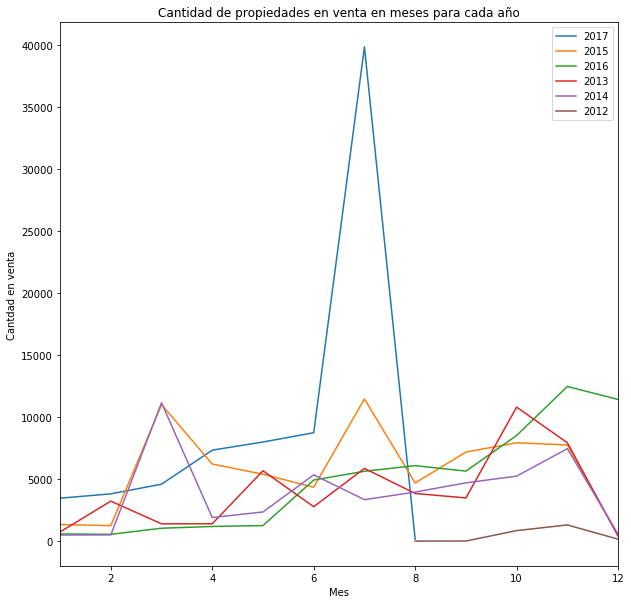

In [353]:
#cantidad de propiedades en venta por mes para cada año
%matplotlib inline
anios = dsSell['year'].value_counts().reset_index()['index']
anios
plt.figure()
plt.title('Cantidad de propiedades en venta en meses para cada año')
for i in anios:
    
    cantidadEnVentaPorMes.groupby('year').get_group(i).groupby('month').mean().loc[:,'cantidad'].plot(figsize=(10,10),label=i);
plt.ylabel('Cantdad en venta')
plt.xlabel('Mes')
plt.legend()
plt.show()

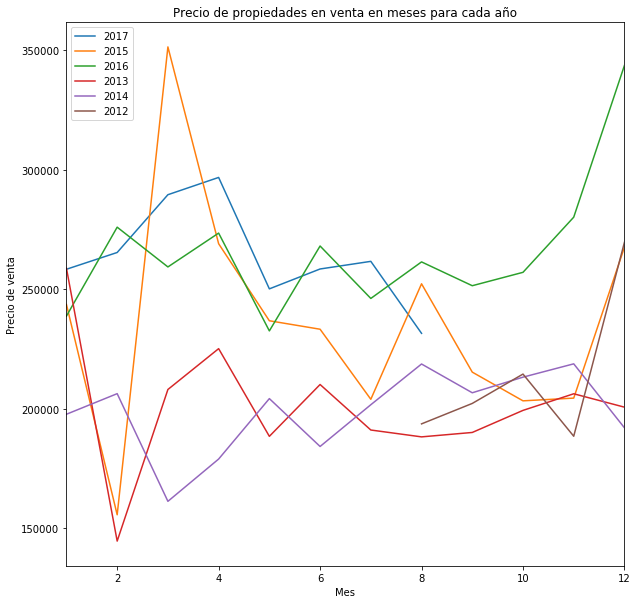

In [355]:
#precio de propiedades en venta por mes para cada año
%matplotlib inline

plt.figure()
plt.title('Precio de propiedades en venta en meses para cada año')
for i in anios:
    
    precioEnEventaPorMes.groupby('year').get_group(i).groupby('month').mean().loc[:,'price_aprox_usd'].plot(figsize=(10,10),label=i);
plt.ylabel('Precio de venta')
plt.xlabel('Mes')
plt.legend()
plt.show()

In [360]:
#funcion que genera un grafico de la frecuencia con la que aparece una caracteristica en la descripcion de la propiedad 
print(len(dsSell))
dsSell.dropna(subset=['description'],inplace =True)
print(len(dsSell))


def buscar_caracteristica_propiedad(c,a):
    cantidades = []
    
    for i in indice:
        aux = dsSell.loc[(dsSell.description.str.contains(c)) & (dsSell.zona.str.contains(i)) & ((dsSell.created_on.str.contains(a))),['lat','lon','description','zona']]\
            .groupby(['lat','lon','description']).count()
        cantidades.append(len(aux))
    numeros = list(range(0,len(indice)))
    plt.figure()
    ax = plt.subplot()
    ax.barh(numeros,cantidades)
    plt.yticks(numeros,indice)
    plt.xlabel('cantidades')
    plt.title('Propiedades ('+c+') por zona para el año '+a+' (segun las descripciones)',fontsize=20)


533949
533949


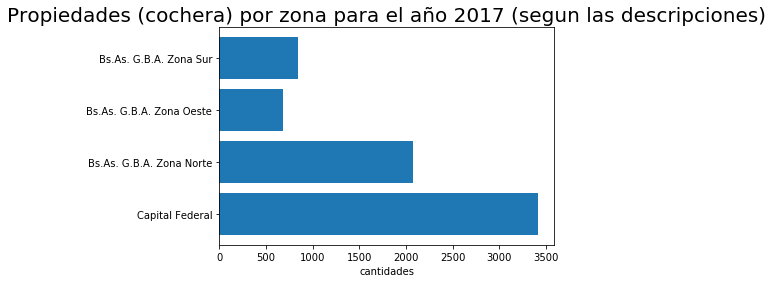

In [361]:
#buscamos las propiedades que tienen cochera para el año 2017
buscar_caracteristica_propiedad('cochera','2017')

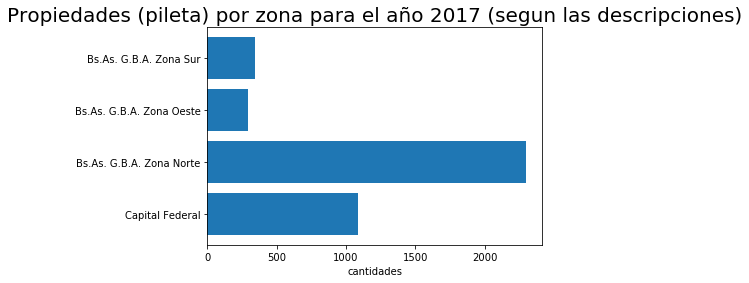

In [362]:
#buscamos las propiedades que tienen pileta para el año 2017 
buscar_caracteristica_propiedad('pileta','2017')

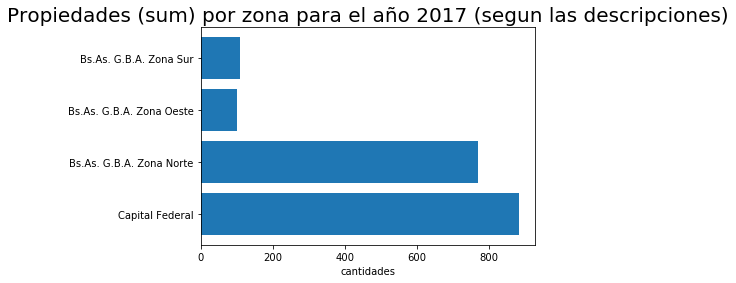

In [363]:
#buscamos las propiedades que tienen sum para el año 2017
buscar_caracteristica_propiedad('sum','2017')

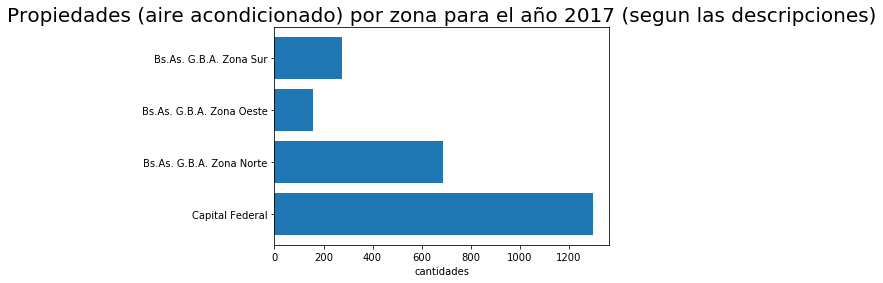

In [364]:
#buscamos las propiedades que tienen aire acondicionado para el año 2017
buscar_caracteristica_propiedad('aire acondicionado','2017')

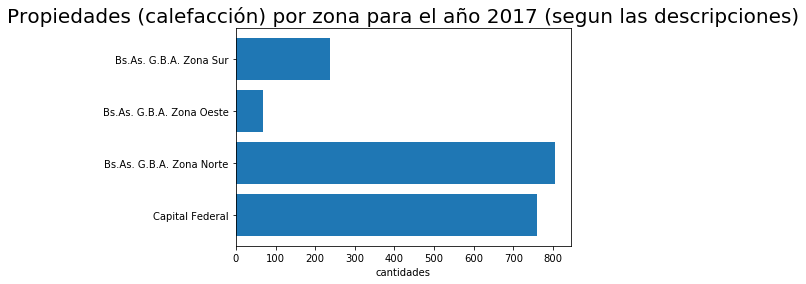

In [365]:
#buscamos las propiedades que tienen calefacción para el año 2017
buscar_caracteristica_propiedad('calefacción','2017')

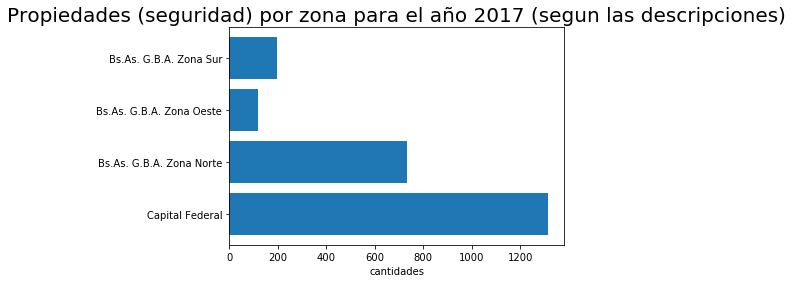

In [366]:
#buscamos las propiedades que tienen seguridad para el año 2017
buscar_caracteristica_propiedad('seguridad','2017')

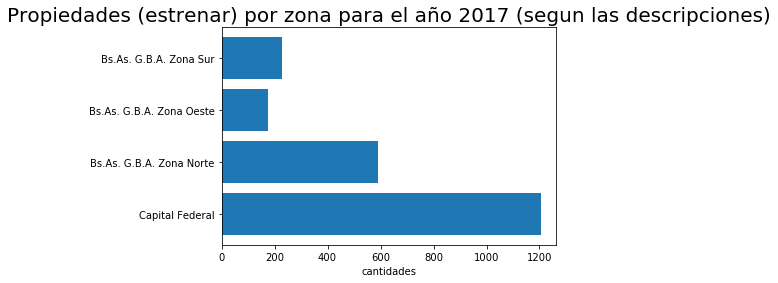

In [367]:
#buscamos las propiedades a estrenar para el año 2017
buscar_caracteristica_propiedad('estrenar','2017')

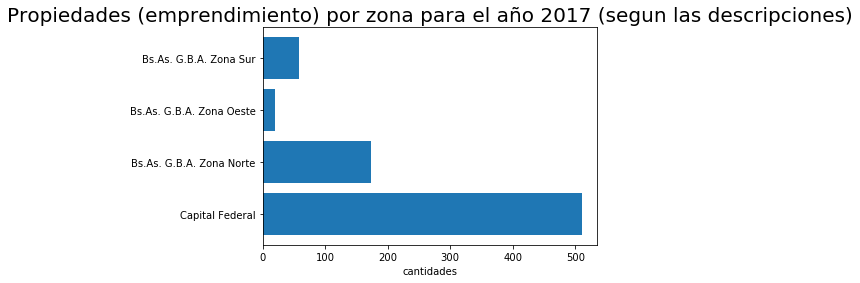

In [368]:
#buscamos las propiedades que son un emprendimiento para el año 2017
buscar_caracteristica_propiedad('emprendimiento','2017')

In [356]:
#sobre esto tal vez se puede hacer analisis de texto 
dsSell[['description', 'image_thumbnail']]

,description,image_thumbnail
3,NaN,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...
6,NaN,http://cf-thumbs.properati.com.ar/BJum1WvpYb6P...
10,NaN,http://cf-thumbs.properati.com.ar/77Q-mNgsgx7O...
11,NaN,http://cf-thumbs.properati.com.ar/DuUbXCV9Xzos...
12,NaN,http://cf-thumbs.properati.com.ar/UAN_2iHtE0hA...
13,NaN,http://cf-thumbs.properati.com.ar/pJ0Vap4MCjhW...
14,NaN,http://cf-thumbs.properati.com.ar/7LLinQKdItkV...
16,NaN,http://cf-thumbs.properati.com.ar/folXLAuUibJC...
17,NaN,http://cf-thumbs.properati.com.ar/QIshWpCxB_sU...
18,NaN,http://cf-thumbs.properati.com.ar/vfIoxXFjrZY7...


In [357]:
#drop de columnas

dsSell.drop('currency', axis=1, inplace=True)
dsSell.drop('extra', axis=1, inplace=True)
dsSell.drop('id', axis=1, inplace=True)
dsSell.drop('image_thumbnail', axis=1, inplace=True)
dsSell.drop('properati_url', axis=1, inplace=True)
dsSell.drop('title', axis=1, inplace=True)
dsSell.drop('lat-lon', axis=1, inplace=True)
dsSell.drop('operation', axis=1, inplace=True)
dsSell.drop('price_aprox_usd', axis=1, inplace=True)
dsSell.drop('price', axis=1, inplace=True)
dsSell.drop('price_aprox_local_currency', axis=1, inplace=True)
dsSell.drop('country_name', axis=1, inplace=True)

In [358]:
#one hot encoding de los place name. me suena mal muchas columnas. performance

one_hot = pd.get_dummies(dsSell['place_name'])
dsSell.drop('place_name', axis=1, inplace=True)
dsSell = dsSell.join(one_hot)